In [1]:
import dynamicrouting_summary as dr
import pandas as pd
import oursin as urchin
import numpy as np
import pyarrow.parquet as pq 
import npc_lims
import npc_session

In [2]:
VERSION = 'any'

In [3]:
connection = npc_lims.get_probe_target_db()

cursor = connection.execute(
    f"SELECT * FROM channel_ccf_coords"
)
channel_ccf_coords = cursor.fetchall()
df_ccf = pd.DataFrame(channel_ccf_coords)[['session', 'Probe', 'Implant', 'Hole']]
df_ccf

,session,Probe,Implant,Hole
0,1167400342,A,41,None
1,1167400342,B,41,None
2,1167400342,C,41,None
3,1167400342,D,41,None
4,1167400342,E,41,None
...,...,...,...,...
1207,686176_2023-12-07,B,2002,F1
1208,686176_2023-12-07,C,2002,F3
1209,686176_2023-12-07,D,2002,D2
1210,686176_2023-12-07,E,2002,E2


In [4]:
cursor = connection.execute(
    f"SELECT * FROM min_distance_to_region"
)
min_distance = cursor.fetchall()
df_min_distance = pd.DataFrame(min_distance)
areas_of_interest = df_min_distance.columns[8:].to_list()
df_min_distance

,index,session,MID,Day,Probe,Implant,Hole,Rig,ACAd,ACAv,...,VISrl,VL,VM,VPL,VPM,VTA,ZI,AUDp,CLA,MGd
0,0,1167400342,599657,1,A,41,None,NP1,894.241234,293.496541,...,3717.397571,1511.714669,1757.501399,2187.950086,2065.528254,2957.023173,2435.497622,4777.061628,3258.406881,None
1,1,1167400342,599657,1,B,41,None,NP1,3766.656459,3092.767608,...,2537.813094,2216.655435,1915.572059,1958.401341,1584.688959,1707.117166,1822.079975,3884.160363,4155.860785,None
2,2,1167400342,599657,1,C,41,None,NP1,4842.923394,4219.463946,...,1073.084355,2332.296716,2315.841831,1433.220425,1365.191267,2270.079219,1508.884649,1979.643105,3250.989101,None
3,3,1167400342,599657,1,D,41,None,NP1,4770.699363,4167.564594,...,758.046498,2302.547298,1846.667289,1370.515003,1223.321302,1499.822519,1050.299251,1458.094812,3412.316956,None
4,4,1167400342,599657,1,E,41,None,NP1,1620.032438,1035.375340,...,2304.300264,999.356398,1974.711467,2173.203355,2076.896767,3216.244474,2615.137481,3631.178804,3050.176347,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,1207,686176_2023-12-07,686176,4,B,2002,F1,NP3,2591.920856,2765.588811,...,3569.017130,2323.897410,3580.924882,3037.090758,3270.414301,4958.656451,3691.219065,3915.334805,1188.457602,None
1208,1208,686176_2023-12-07,686176,4,C,2002,F3,NP3,2276.133680,2326.687364,...,3105.363375,1988.264169,3343.772839,2931.298471,3101.518885,4803.332762,3621.864320,3923.606615,1743.293099,None
1209,1209,686176_2023-12-07,686176,4,D,2002,D2,NP3,4661.180886,3957.726410,...,1128.271822,2269.143510,1609.781997,1398.306175,1160.684177,1227.248106,1000.282247,2330.878239,3564.377748,None
1210,1210,686176_2023-12-07,686176,4,E,2002,E2,NP3,5168.735656,4534.621039,...,995.529015,2887.414931,3165.131237,2407.682701,2203.856048,2851.911062,2504.471400,1883.482418,4302.805416,None


In [5]:
units = pq.ParquetDataset(npc_lims.get_cache_path('units', version=VERSION))
units.schema

amplitude_cutoff: double
amplitude_cv_median: double
amplitude_cv_range: double
amplitude_median: double
drift_ptp: double
drift_std: double
drift_mad: double
firing_range: double
firing_rate: double
isi_violations_ratio: double
isi_violations_count: double
num_spikes: double
presence_ratio: double
rp_contamination: double
rp_violations: double
sliding_rp_violation: double
snr: double
sync_spike_2: double
sync_spike_4: double
sync_spike_8: double
d_prime: double
isolation_distance: double
l_ratio: double
silhouette: double
nn_hit_rate: double
nn_miss_rate: double
exp_decay: double
half_width: double
num_negative_peaks: int64
num_positive_peaks: int64
peak_to_valley: double
peak_trough_ratio: double
recovery_slope: double
repolarization_slope: double
spread: double
velocity_above: double
velocity_below: double
electrode_group_name: string
peak_channel: int64
cluster_id: int64
default_qc: bool
amplitude: double
channels: list<element: int64>
  child 0, element: int64
unit_id: string
grou

In [6]:
electrode_groups = pq.ParquetDataset(npc_lims.get_cache_path('electrode_groups', version=VERSION)).read_pandas().to_pandas()
electrodes_original = pq.ParquetDataset(npc_lims.get_cache_path('electrodes', version=VERSION)).read_pandas().to_pandas()
units_structures = pq.ParquetDataset(npc_lims.get_cache_path('units', version=VERSION)).read(columns=['structure', 'location', 'peak_channel', 'subject_id', 'session_idx', 'date', 
                                      'ccf_ap', 'ccf_dv', 'ccf_ml', 'group_name', 'default_qc', 'unit_id']).to_pandas()
performance = pq.ParquetDataset(npc_lims.get_cache_path('performance', version=VERSION)).read_pandas().to_pandas()

In [7]:
electrodes_original['session_id'].unique().tolist()

['660023_2023-08-09_0',
 '664851_2023-11-15_0',
 '664851_2023-11-16_0',
 '666986_2023-08-15_0',
 '666986_2023-08-16_0',
 '666986_2023-08-17_0',
 '667252_2023-09-25_0',
 '667252_2023-09-26_0',
 '668755_2023-08-30_0',
 '668759_2023-07-11_0',
 '668759_2023-07-12_0',
 '670181_2023-07-18_0',
 '670248_2023-08-02_0',
 '674562_2023-10-03_0',
 '674562_2023-10-04_0',
 '674562_2023-10-05_0',
 '676909_2023-12-12_0',
 '676909_2023-12-13_0',
 '676909_2023-12-14_0',
 '681532_2023-10-16_0',
 '681532_2023-10-17_0',
 '681532_2023-10-18_0',
 '686176_2023-12-04_0',
 '686176_2023-12-07_0',
 '686740_2023-10-23_0',
 '686740_2023-10-25_0',
 '686740_2023-10-26_0',
 '690706_2023-11-27_0',
 '690706_2023-11-29_0',
 '690706_2023-11-30_0']

In [8]:
subjects_passing_behavior = []
for subject in performance['subject_id'].unique():
    if dr.is_subject_passing_behavior(subject, performance):
        subjects_passing_behavior.append(subject)

In [9]:
subjects_passing_behavior = electrodes_original['subject_id'].unique().tolist()

In [10]:
electrodes_original = dr.add_bool_columns(electrodes_original, version=VERSION)
units_structures_with_bools = dr.add_bool_columns(units_structures, version=VERSION)
#electrodes_original = electrodes_original[electrodes_original['subject_id'].isin(subjects_passing_behavior)]
units_structures_with_bools = units_structures_with_bools[units_structures_with_bools['subject_id'].isin(subjects_passing_behavior)]

units_structures_with_bools.dropna(inplace=True)
units_structures_with_bools.columns

Index(['structure', 'location', 'peak_channel', 'subject_id', 'session_idx',
       'date', 'ccf_ap', 'ccf_dv', 'ccf_ml', 'group_name', 'default_qc',
       'unit_id', 'session_id', 'is_ephys', 'is_templeton', 'is_training',
       'is_dynamic_routing', 'is_opto'],
      dtype='object')

In [11]:
len(electrodes_original['session_id'].unique())

30

In [12]:
electrodes_original.columns

Index(['location', 'group_name', 'structure', 'x', 'y', 'z', 'channel',
       'rel_x', 'rel_y', 'reference', 'imp', 'session_idx', 'date',
       'subject_id', 'session_id', 'is_ephys', 'is_templeton', 'is_training',
       'is_dynamic_routing', 'is_opto'],
      dtype='object')

In [13]:
import ipywidgets

electrodes = electrodes_original.dropna()
electrodes = electrodes[~(electrodes['session_id'].str.contains('662892'))]
electrodes = electrodes[~(electrodes['structure'].str.islower())]
electrodes = electrodes[electrodes['is_dynamic_routing'] == True]
electrodes.columns

Index(['location', 'group_name', 'structure', 'x', 'y', 'z', 'channel',
       'rel_x', 'rel_y', 'reference', 'imp', 'session_idx', 'date',
       'subject_id', 'session_id', 'is_ephys', 'is_templeton', 'is_training',
       'is_dynamic_routing', 'is_opto'],
      dtype='object')

In [14]:
electrodes = electrodes.merge(electrode_groups, left_on=['session_id', 'group_name'], right_on=['session_id', 'name'])
electrodes.columns

Index(['location_x', 'group_name', 'structure', 'x', 'y', 'z', 'channel',
       'rel_x', 'rel_y', 'reference', 'imp', 'session_idx_x', 'date_x',
       'subject_id_x', 'session_id', 'is_ephys', 'is_templeton', 'is_training',
       'is_dynamic_routing', 'is_opto', 'description', 'location_y', 'name',
       'session_idx_y', 'date_y', 'subject_id_y'],
      dtype='object')

In [15]:
units_structures_with_bools_dr = units_structures_with_bools[units_structures_with_bools['is_dynamic_routing'] == True]
units_structures_with_bools_dr.columns

Index(['structure', 'location', 'peak_channel', 'subject_id', 'session_idx',
       'date', 'ccf_ap', 'ccf_dv', 'ccf_ml', 'group_name', 'default_qc',
       'unit_id', 'session_id', 'is_ephys', 'is_templeton', 'is_training',
       'is_dynamic_routing', 'is_opto'],
      dtype='object')

In [16]:
units_structures_with_bools_dr = units_structures_with_bools_dr.merge(electrode_groups, left_on=['session_id', 'group_name'], right_on=['session_id', 'name'])
units_structures_with_bools_dr.columns

Index(['structure', 'location_x', 'peak_channel', 'subject_id_x',
       'session_idx_x', 'date_x', 'ccf_ap', 'ccf_dv', 'ccf_ml', 'group_name',
       'default_qc', 'unit_id', 'session_id', 'is_ephys', 'is_templeton',
       'is_training', 'is_dynamic_routing', 'is_opto', 'description',
       'location_y', 'name', 'session_idx_y', 'date_y', 'subject_id_y'],
      dtype='object')

In [17]:
from ipywidgets import interact, Box

In [18]:
def get_subject_colors(electrodes_structures_area: pd.DataFrame) -> list[tuple[int, int, int]]: 
    subject_colors = dr.utils.generate_subject_random_colors(electrodes_structures_area)
    subject_color_list = []

    for index, row in electrodes_structures_area.iterrows():
        subject_color_list.append(subject_colors[str(row['subject_id_x'])])
    
    return subject_color_list

In [19]:
unique_implants = df_ccf['Implant'].unique().tolist()
unique_implants.append('All')
implants_dropdown = ipywidgets.Dropdown(options=unique_implants, value=unique_implants[-1], description='Implants', disabled=False)

unique_holes = df_ccf['Hole'].unique().tolist()
unique_holes.append('All')
holes_dropdown = ipywidgets.Dropdown(options=unique_holes, value=unique_holes[-1], description='Holes', disabled=False)

unique_probes = df_ccf['Probe'].unique().tolist()
unique_probes.append('All')
probes_dropdown = ipywidgets.Dropdown(options=unique_probes, value=unique_probes[-1], description='Probes', disabled=False)

In [20]:
def update_3d_viewer_based_on_trajectory() -> tuple[list]:
    urchin.ccf25.clear()
    urchin.clear_meshes()

    if implants_dropdown.value == 'All':
        pmeshes = urchin.meshes.create(len(electrodes)) #creates 2 primitives, stored in list pmeshes
        electrodes_sessions = electrodes
        coords = electrodes[['x', 'z', 'y']].to_numpy().tolist()
    else:
        probe_target_sessions = df_ccf[(df_ccf['Implant'] == implants_dropdown.value) & (df_ccf['Hole'] == holes_dropdown.value)
                                    & (df_ccf['Probe'] == probes_dropdown.value)]['session'].tolist()
        probe_target_sessions_filtered = []
        for session in probe_target_sessions:
            try:
                session_record = npc_session.SessionRecord(session)
                probe_target_sessions_filtered.append(f"{session_record.subject}_{session_record.date}_{session_record.idx}")
            except ValueError:
                pass
        
        electrodes_sessions = electrodes[electrodes['session_id'].isin(probe_target_sessions_filtered)]
        electrodes_sessions = electrodes_sessions[electrodes_sessions['group_name'] == f"probe{probes_dropdown.value}"]
        pmeshes = urchin.meshes.create(len(electrodes_sessions)) #creates 2 primitives, stored in list pmeshes
        coords = electrodes_sessions[['x', 'z', 'y']].to_numpy().tolist()
   
    callback_ids = [mesh.id for mesh in pmeshes]
    print(f"Implant {implants_dropdown.value} Hole {holes_dropdown.value} Probe {probes_dropdown.value}")
    print(f"Sessions: {electrodes_sessions['session_id'].unique().tolist()}")
    print(f"Areas: {electrodes_sessions['structure'].unique().tolist()}")
    urchin.ccf25.root.set_visibility(True)
    urchin.ccf25.root.set_material('transparent-lit')
    urchin.ccf25.root.set_alpha(0.15)
    urchin.ccf25.root.set_color("#000000")

    # reorder to AP/ML/DV for Urchin and make a list of lists
    coords_list = [[x[0], x[1], x[2]] for x in coords]
    session_list = electrodes_sessions[['session_id', 'location_y', 'group_name']].to_numpy().tolist()
    sizes_list = [[0.07,0.07,0.07]]*len(coords)

    urchin.meshes.set_positions(pmeshes,coords_list) #sets the positions of the primitives
    urchin.meshes.set_colors(pmeshes, get_subject_colors(electrodes_sessions))
    urchin.meshes.set_scales(pmeshes, sizes_list)

    area_list = urchin.ccf25.get_areas(electrodes_sessions['structure'].unique().tolist())
    urchin.ccf25.set_visibilities(area_list, True, urchin.utils.Side.LEFT)
    urchin.ccf25.set_materials(area_list, 'transparent-unlit', "left")
    urchin.ccf25.set_alphas(area_list, 0.2, "left")

    return callback_ids, session_list

In [21]:
def filter_by_implant(implant: str):
    if implant == 'All':
        holes_dropdown.options = unique_holes
        holes_dropdown.value = 'All'
    else:
        df_implant = df_ccf[df_ccf['Implant'] == implant]
        holes_dropdown.options = df_implant['Hole'].unique().tolist()
        holes_dropdown.value = holes_dropdown.options[0]

In [22]:
def filter_by_implant_hole(implant: str, hole: str):
    if implant == 'All' and hole == 'All':
        probes_dropdown.options = unique_probes
        probes_dropdown.value = 'All'
    else:
        df_implant_hole = df_ccf[(df_ccf['Implant'] == implant) & (df_ccf['Hole'] == hole)]
        probes_dropdown.options = sorted(df_implant_hole['Probe'].unique().tolist())
        probes_dropdown.value = probes_dropdown.options[0]

In [23]:
urchin.setup()

(URN) connected to server
Login sent with ID: b512a2ee, copy this ID into the renderer to connect.


Selected unit 666986_2023-08-16_F-338
Selected unit 666986_2023-08-16_F-647
Selected unit 666986_2023-08-16_F-649
Selected unit 666986_2023-08-16_F-140
Selected unit 666986_2023-08-16_F-214
Selected unit 666986_2023-08-16_F-213


In [24]:
urchin.ccf25.load()

In [25]:
@interact(x=['coronal', 'axial', 'sagittal'])
def camera_rotation(x):
    urchin.camera.main.set_rotation(x)
    urchin.camera.main.set_mode('perspective')
    urchin.camera.main.set_background_color('#ffffff')

interactive(children=(Dropdown(description='x', options=('coronal', 'axial', 'sagittal'), value='coronal'), Ou…

In [26]:
@interact(x=(5, 60))
def zoom(x=45):
    urchin.camera.main.set_zoom(60-x)

interactive(children=(IntSlider(value=45, description='x', max=60, min=5), Output()), _dom_classes=('widget-in…

In [27]:
items = [implants_dropdown, holes_dropdown, probes_dropdown]
box = Box(children=items)
box

Box(children=(Dropdown(description='Implants', index=8, options=('41', 'football', 'TS1', 'TS5', '2002', 'temp…

In [ ]:
filter_by_implant(implants_dropdown.value)

In [ ]:
filter_by_implant_hole(implants_dropdown.value, holes_dropdown.value)

In [ ]:
call_back_ids, session_list = update_3d_viewer_based_on_trajectory()

In [28]:
unique_areas = electrodes['structure'].unique()
unique_areas.sort()
area_dropdown = ipywidgets.Dropdown(options=unique_areas, value=unique_areas[0], description='CCF Structure Area', disabled=False)

def update_3d_viewer(area: str) -> tuple[list]:
    urchin.ccf25.clear()
    urchin.clear_meshes()
    units_structures_with_bools_dr_area = units_structures_with_bools_dr[units_structures_with_bools_dr['structure'] == area]
    electrodes_structures_area = electrodes[electrodes['structure'] == area]

    print(f"{area}: {len(electrodes_structures_area['subject_id_x'].unique())} mice")
    print(f"{area}: {len(electrodes_structures_area['session_id'].unique())} sessions")
    print(f"{area}: {len(units_structures_with_bools_dr_area)} units")

    pmeshes = urchin.meshes.create(len(units_structures_with_bools_dr_area)) #creates 2 primitives, stored in list pmeshes
    coords = units_structures_with_bools_dr_area[['ccf_ap', 'ccf_ml', 'ccf_dv']].to_numpy().tolist()
    callback_ids = [mesh.id for mesh in pmeshes]
    session_list = units_structures_with_bools_dr_area[['session_id', 'location_y', 'group_name', 'unit_id']].to_numpy().tolist()

    urchin.ccf25.root.set_visibility(True)
    urchin.ccf25.root.set_material('transparent-lit')
    urchin.ccf25.root.set_alpha(0.15)
    urchin.ccf25.root.set_color("#000000")

    # reorder to AP/ML/DV for Urchin and make a list of lists
    coords_list = [[x[0], x[1], x[2]] for x in coords]
    sizes_list = [[0.03,0.03,0.03]]*len(coords)

    urchin.meshes.set_positions(pmeshes,coords_list) #sets the positions of the primitives
    urchin.meshes.set_colors(pmeshes, get_subject_colors(units_structures_with_bools_dr_area))
    urchin.meshes.set_scales(pmeshes, sizes_list)

    area_list = urchin.ccf25.get_areas([area])

    urchin.ccf25.set_visibilities(area_list, True, urchin.utils.Side.LEFT)
    urchin.ccf25.set_materials(area_list, 'transparent-unlit', "left")
    urchin.ccf25.set_alphas(area_list, 0.2, "left")

    return callback_ids, session_list

area_dropdown


Dropdown(description='CCF Structure Area', options=('ACAd', 'ACAv', 'ACB', 'AD', 'AId', 'AIv', 'AMd', 'AMv', '…

In [29]:
call_back_ids, session_list = update_3d_viewer(area_dropdown.value)

CP: 10 mice
CP: 13 sessions
CP: 2019 units


In [ ]:
area_dropdown_min_distance = ipywidgets.Dropdown(options=areas_of_interest, value=areas_of_interest[0], description='Areas for min distance viewer', disabled=False)
area_dropdown_min_distance

In [ ]:
@interact(min_distance_to_area=(250, 500))
def min_distance_viewer(min_distance_to_area=300):
    urchin.ccf25.clear()
    urchin.clear_meshes()

    probe_target_sessions = df_min_distance[(df_min_distance[area_dropdown_min_distance.value] / 25) <= min_distance_to_area]
    probe_target_sessions_filtered = []
    for session in probe_target_sessions['session'].tolist():
        try:
            session_record = npc_session.SessionRecord(session)
            probe_target_sessions_filtered.append(f"{session_record.subject}_{session_record.date}_{session_record.idx}")
        except ValueError:
            pass
    
    electrodes_sessions = electrodes[electrodes['session_id'].isin(probe_target_sessions_filtered)]
    electrodes_sessions = electrodes_sessions[electrodes_sessions['structure'] == area_dropdown_min_distance.value]
    pmeshes = urchin.meshes.create(len(electrodes_sessions)) #creates 2 primitives, stored in list pmeshes
    coords = electrodes_sessions[['x', 'z', 'y']].to_numpy().tolist()
   
    print(f"Sessions: {electrodes_sessions['session_id'].unique().tolist()}")
  
    
    urchin.ccf25.root.set_visibility(True)
    urchin.ccf25.root.set_material('transparent-lit')
    urchin.ccf25.root.set_alpha(0.15)
    urchin.ccf25.root.set_color("#000000")

    # reorder to AP/ML/DV for Urchin and make a list of lists
    coords_list = [[x[0], x[1], x[2]] for x in coords]
    session_list = electrodes_sessions['session_id'].tolist()
    sizes_list = [[0.07,0.07,0.07]]*len(coords)

    urchin.meshes.set_positions(pmeshes,coords_list) #sets the positions of the primitives
    urchin.meshes.set_colors(pmeshes, get_subject_colors(electrodes_sessions))
    urchin.meshes.set_scales(pmeshes, sizes_list)

    area_list = urchin.ccf25.get_areas(electrodes_sessions['structure'].unique().tolist())
    urchin.ccf25.set_visibilities(area_list, True, urchin.utils.Side.LEFT)
    urchin.ccf25.set_materials(area_list, 'transparent-unlit', "left")
    urchin.ccf25.set_alphas(area_list, 0.2, "left")
    

In [ ]:
counts = {'area': [], 'num_units': [], 'num_sessions': [], 'num_subjects': []}
units_structure_areas_no_white_matter = units_structures_with_bools_dr[~(units_structures_with_bools_dr['structure'].str.islower())]
for area in units_structure_areas_no_white_matter['structure'].unique():
    units_structure_areas = units_structure_areas_no_white_matter[units_structure_areas_no_white_matter['structure'] == area]
    counts['area'].append(area)
    counts['num_sessions'].append(len(units_structure_areas['session_id'].unique()))
    counts['num_subjects'].append(len(units_structure_areas['subject_id'].unique()))
    counts['num_units'].append(len(units_structure_areas))

df_counts = pd.DataFrame(counts)

In [ ]:
df_counts.style.applymap(lambda x: 'background-color : red' if x>=3 else '', subset=['num_subjects']).applymap(lambda x: 'background-color : red' if x>150 else '', subset=['num_units'])

In [30]:
import zarr
times = zarr.open(npc_lims.get_cache_path('spike_times', version='any'))

['666986_2023-08-16_0', '2002 F1', 'probeF', '666986_2023-08-16_F-338']

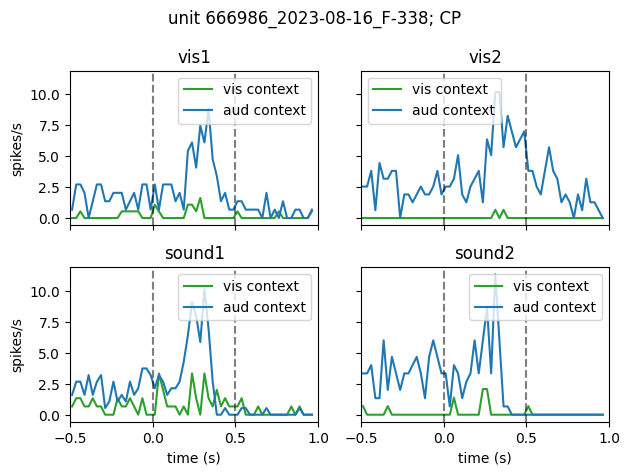

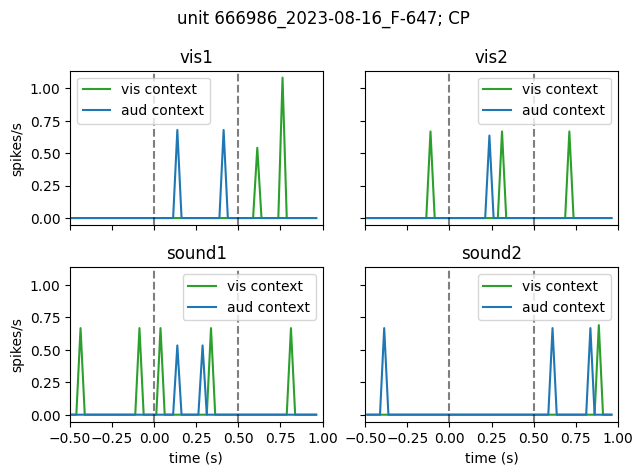

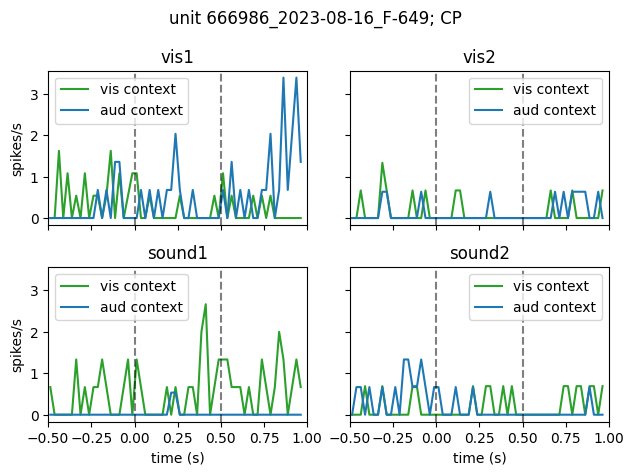

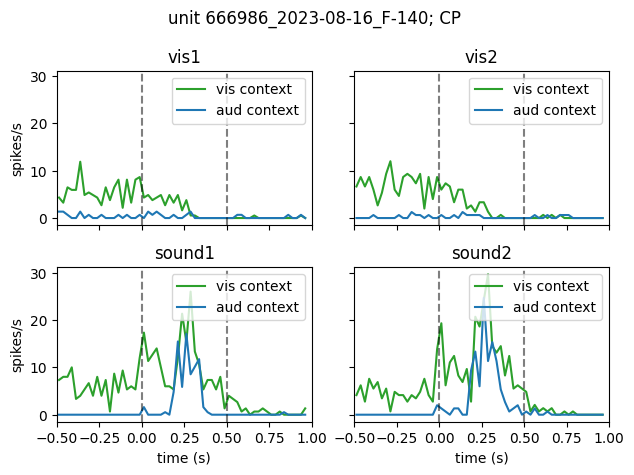

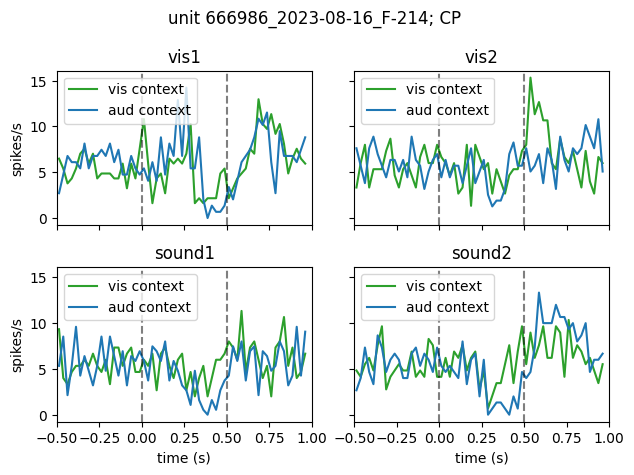

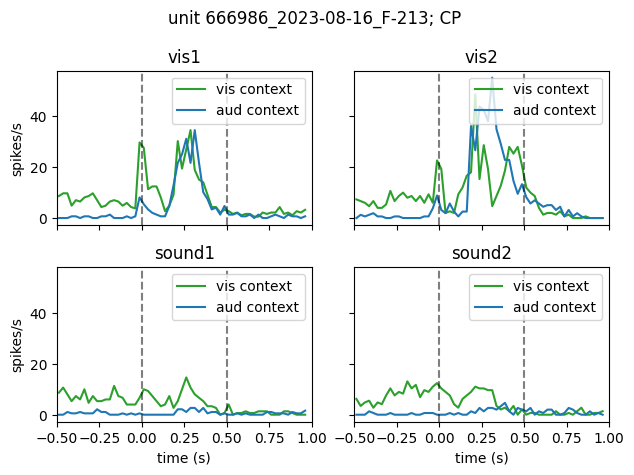

In [31]:
from IPython.display import display, Image, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

def display_session_trajectory(index: str):
    session = session_list[call_back_ids.index(index)]
    session_id = npc_session.SessionRecord(session[0])
    hole_implant = session[1]
    probe = session[2]
    clicked_unit_id = session[3]
    clear_output()
    display(session)
    unit_ids_session_probe_hole = units_structures_with_bools_dr[(units_structures_with_bools_dr['session_id'] == session_id)
                                    & (units_structures_with_bools_dr['location_y'] == hole_implant)
                                    & (units_structures_with_bools_dr['structure'] == area_dropdown.value)
                                    & (units_structures_with_bools_dr['group_name'] == probe)]['unit_id'].tolist()
    #display(unit_ids_session_probe_hole)
    fig = dr.plot_unit_by_id(clicked_unit_id, times[f'/{session_id.subject}_{session_id.date}/{clicked_unit_id}'][:])
    display(fig)
    plt.close(fig)
    unit_ids_session_probe_hole.remove(clicked_unit_id)
    for unit_id in unit_ids_session_probe_hole[0:5]:
        fig = dr.plot_unit_by_id(unit_id, times[f'/{session_id.subject}_{session_id.date}/{unit_id}'][:])
        display(fig)
        plt.close(fig)
    
urchin.meshes.callback = display_session_trajectory